<a href="https://colab.research.google.com/github/Colorful-Intelligence/-Biomechanical-feature-of-orthopedic-data-with-KNN/blob/main/VGG19_COVID19_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Installing Required Libraries

In [ ]:
!pip install  visualkeras
!pip3 install ann_visualizer
!pip install graphviz

     |████████████████████████████████| 795 kB 6.8 MB/s 
  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=930f5346b542f17e56057c8fa9075b541b45f0872d2c6a4cdbb08bafef31c816
  Stored in directory: /root/.cache/pip/wheels/1b/fc/58/2ab1c3b30350105929308becddda4fb59b1358e54f985e1f4a
Successfully built ann-visualizer


# LIBRARIES

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import *
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.vgg19 import VGG19
import matplotlib.pyplot as plt
from glob import glob
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, confusion_matrix
import visualkeras
from ann_visualizer.visualize import ann_viz
from tensorflow.keras.callbacks import EarlyStopping ,ModelCheckpoint
import os
import cv2

# Reading the Dataset

In [ ]:
train_path = "/content/drive/My Drive/Covid19-dataset/train/"
test_path = "/content/drive/My Drive/Covid19-dataset/test/"

# Exploratory Data Analysis - 1

In [ ]:
numberOfClass = len(glob(train_path+"/*")) 
print("Number of Class: ",numberOfClass)

Number of Class:  3


# Exploratory Data Analysis - 2 (Sample Images)

In [ ]:
def sampleImage(sampe_image_path):
  img = load_img(train_path + sampe_image_path)
  x = img_to_array(img)
  print(x.shape)
  plt.imshow(img)
  plt.axis("off")
  plt.show()

COVID-19

(700, 888, 3)


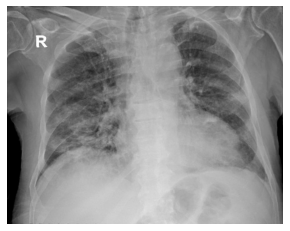

In [ ]:
sample_image_path1 = "Covid/COVID-00030.jpg"
sampleImage(sample_image_path1)

NORMAL

(1882, 2752, 3)


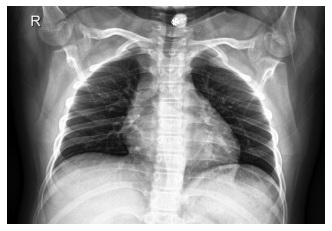

In [ ]:
sample_image_path2 = "Normal/015.jpeg"
sampleImage(sample_image_path2)

VIRAL PNEUMONIA

(1152, 1344, 3)


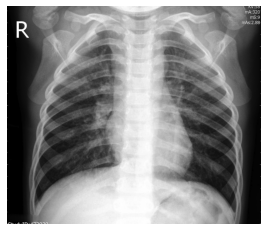

In [ ]:
sample_image_path2 = "Viral Pneumonia/023.jpeg"
sampleImage(sample_image_path2)

# Outcome of the Exploratory Data Analysis - 2 
As we can see , every image shape is different , so we have to resize each images at same size.

# DATA PREPROCESSING FOR TRAIN DATA

In [ ]:
def preprocessOperation(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_COLOR) 
    img = cv2.resize(img, (256, 256)) # resize operation
    img = np.array(img, dtype='float32') 
    img = img/255  # normalization 
    return img

In [ ]:
X_train = [] # We will  store train images here
y_train = [] # We will store train labels

# LABELS
# 0 - Covid
# 1 - Viral Pneumonia
# 2 - Normal

train_path = "/content/drive/My Drive/Covid19-dataset/train/"

In [ ]:
for folder in os.scandir(train_path):
    for entry in os.scandir(train_path + folder.name):

        X_train.append(preprocessOperation(train_path + folder.name + '/' + entry.name))
        
        if folder.name[0]=='C':
            y_train.append(0)
        elif folder.name[0]=='V':
            y_train.append(1)
        else:
            y_train.append(2)

In [ ]:
X_train = np.array(X_train)
X_train.shape

(251, 256, 256, 3)

In [ ]:
y_train = np.array(y_train)
y_train.shape

(251,)

# Visualize of the Dataset

<BarContainer object of 3 artists>

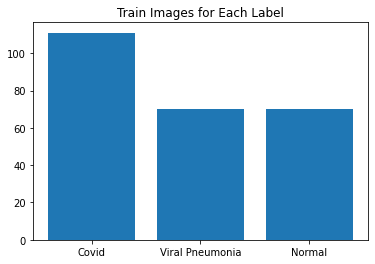

In [ ]:
covid_amount = len(y_train[y_train==0])
pneumonia_amount = len(y_train[y_train==1])
normal_amount = len(y_train[y_train==2])

plt.title("Train Images for Each Label")
plt.bar(["Covid", "Viral Pneumonia", "Normal"],[covid_amount, pneumonia_amount, normal_amount])

# Data Augmentation

In [ ]:
X_aug = []
y_aug = []

for i in range(0, len(y_train)):
    X_new = np.fliplr(X_train[i])
    X_aug.append(X_new)
    y_aug.append(y_train[i])

X_aug = np.array(X_aug)
y_aug = np.array(y_aug)
X_train = np.append(X_train, X_aug, axis=0) # appending augmented images to original training samples
X_train.shape

(502, 256, 256, 3)

In [ ]:
y_train = np.append(y_train, y_aug, axis=0)
y_train.shape

(502,)

# DATA PREPROCESSING FOR TEST DATA

In [ ]:
X_val = [] # We will store test images
y_val = [] # We will  store labels

test_path = "/content/drive/My Drive/Covid19-dataset/test/"

for folder in os.scandir(test_path):
    for entry in os.scandir(test_path + folder.name):

        X_val.append(preprocessOperation(test_path + folder.name + '/' + entry.name))
        
        if folder.name[0]=='C':
            y_val.append(0)
        elif folder.name[0]=='V':
            y_val.append(1)
        else:
            y_val.append(2)
            
X_val = np.array(X_val)
y_val = np.array(y_val)

In [ ]:
X_val.shape

(66, 256, 256, 3)

<BarContainer object of 3 artists>

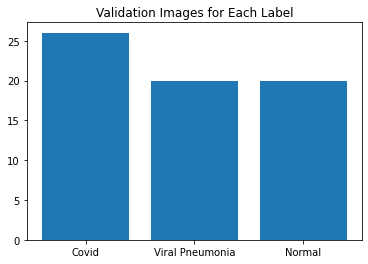

In [ ]:
covid_amount_test = len(y_val[y_val==0])
pneumonia_amount_test = len(y_val[y_val==1])
normal_amount_test = len(y_val[y_val==2])

plt.title("Validation Images for Each Label")
plt.bar(["Covid", "Viral Pneumonia", "Normal"],[covid_amount_test, pneumonia_amount_test, normal_amount_test])

# Building VGG19

In [ ]:
vgg = VGG19(weights = 'imagenet', include_top = False, input_tensor = Input(shape=(256, 256, 3)))

80150528/80134624 [==============================] - 0s 0us/step


# Layers of the VGG19

In [ ]:
print(vgg.summary())

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [ ]:
# freeze the model weights
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
headmodel = vgg.output
headmodel = Flatten(name= 'flatten')(headmodel)
headmodel = Dense(3, activation = 'softmax')(headmodel) # In Dense Layer , number of neurons must be number of label
model = Model(inputs = vgg.input, outputs = headmodel)

Layers of the Model

In [ ]:
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

# Visualize of the Model

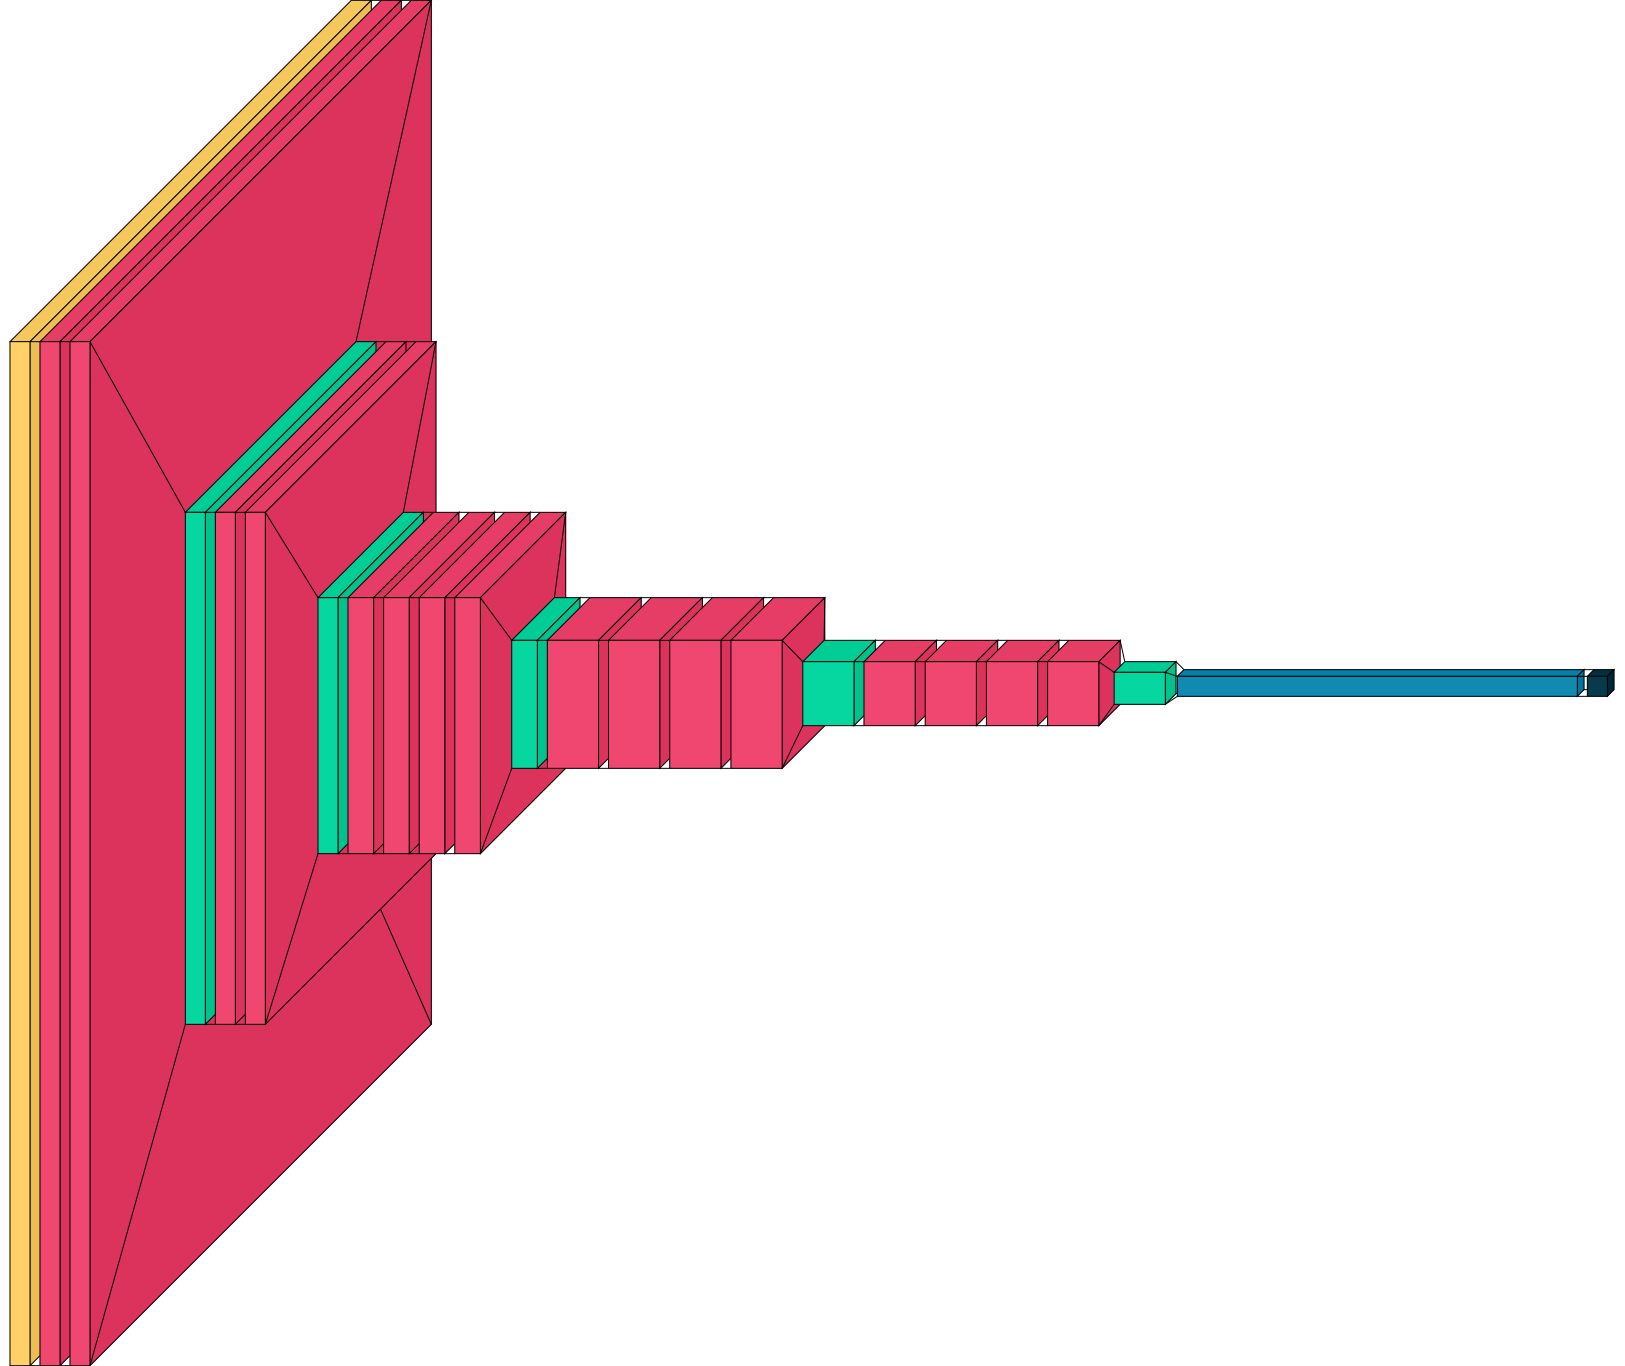

In [ ]:
visualkeras.layered_view(model)

# Optimization

In [52]:
opt = optimizers.Adam(learning_rate=0.0001)

# Compiling the Model

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer=opt, 
              metrics= ["accuracy"]
              )

# Training the Model

In [ ]:
# We using earlystopping for overfitting case.
# If validation loss is not decreasing even after certain epochs , we will exit training
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [ ]:
checkpointer = ModelCheckpoint(filepath="covid_vgg19_Model.h5", verbose=1, save_best_only=True)

In [ ]:
history = model.fit(X_train, y_train, epochs = 50, 
                    validation_data=(X_val, y_val), 
                    batch_size=16, 
                    shuffle=True, 
                    callbacks=[earlystopping, checkpointer]
                    )

Epoch 1/50
32/32 [==============================] - 21s 103ms/step - loss: 0.7921 - accuracy: 0.6952 - val_loss: 0.5183 - val_accuracy: 0.8030

Epoch 00001: val_loss improved from inf to 0.51826, saving model to covid_vgg19_Model.h5
Epoch 2/50
32/32 [==============================] - 2s 57ms/step - loss: 0.3471 - accuracy: 0.9084 - val_loss: 0.3890 - val_accuracy: 0.7727

Epoch 00002: val_loss improved from 0.51826 to 0.38900, saving model to covid_vgg19_Model.h5
Epoch 3/50
32/32 [==============================] - 2s 57ms/step - loss: 0.2380 - accuracy: 0.9363 - val_loss: 0.3430 - val_accuracy: 0.8182

Epoch 00003: val_loss improved from 0.38900 to 0.34300, saving model to covid_vgg19_Model.h5
Epoch 4/50
32/32 [==============================] - 2s 58ms/step - loss: 0.1773 - accuracy: 0.9542 - val_loss: 0.2728 - val_accuracy: 0.8788

Epoch 00004: val_loss improved from 0.34300 to 0.27284, saving model to covid_vgg19_Model.h5
Epoch 5/50
32/32 [==============================] - 2s 57ms/st

# Visualization

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


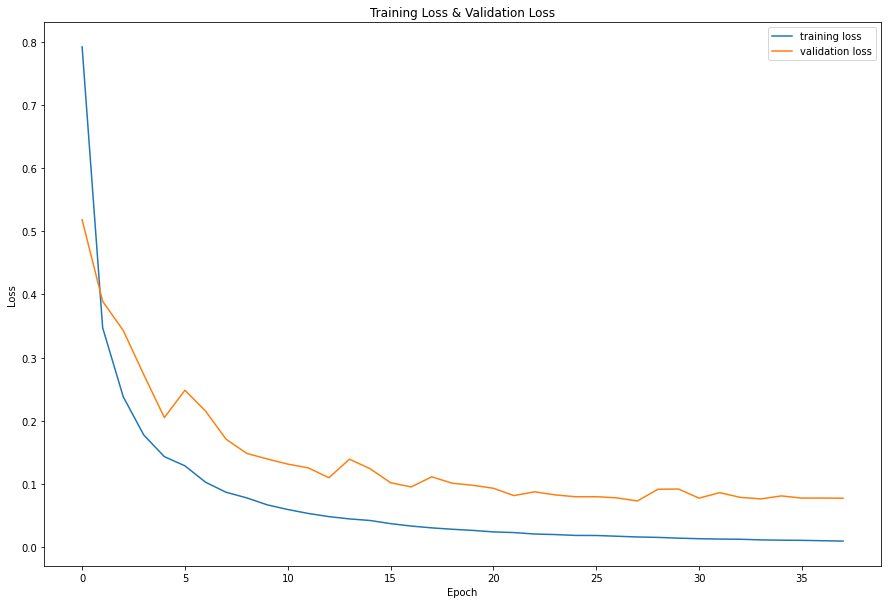

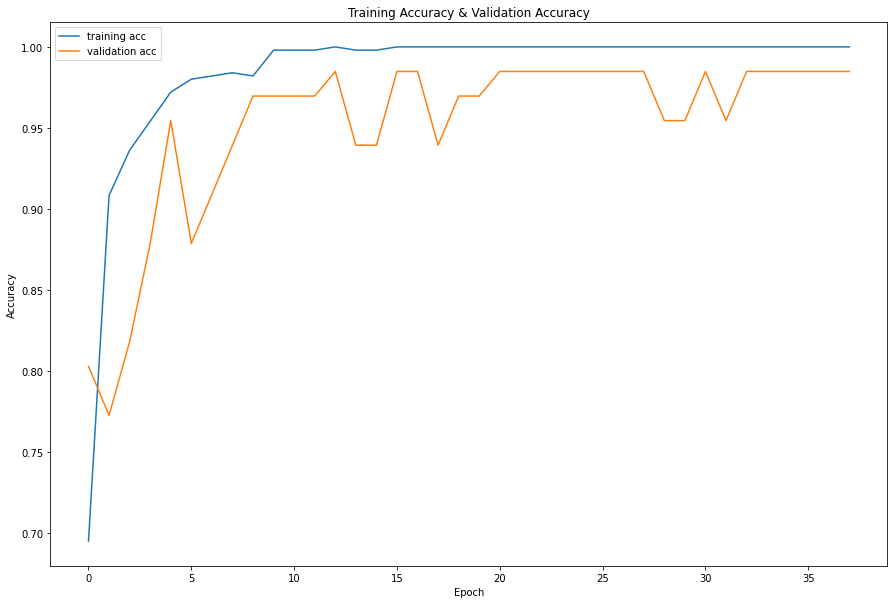

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(history.history["loss"],label = "training loss")
plt.plot(history.history["val_loss"],label = "validation loss")
plt.title("Training Loss & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(15,10))
plt.plot(history.history["accuracy"],label = "training acc")
plt.plot(history.history["val_accuracy"],label = "validation acc")
plt.title("Training Accuracy & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Acuracy of the Model

In [ ]:
predictions = model.predict(X_val)

In [ ]:
predict = []
for i in predictions:
  predict.append(np.argmax(i))
predict = np.asarray(predict)

In [ ]:
accuracy = accuracy_score(y_val, predict)
print("Accuracy of the Model = {}".format(accuracy*100))

Accuracy of the Model = 98.48484848484848


# CLASSIFICATION REPORT

In [ ]:
report = classification_report(y_val, predict)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       0.95      1.00      0.98        20
           2       1.00      0.95      0.97        20

    accuracy                           0.98        66
   macro avg       0.98      0.98      0.98        66
weighted avg       0.99      0.98      0.98        66



# CONFUSION MATRIX

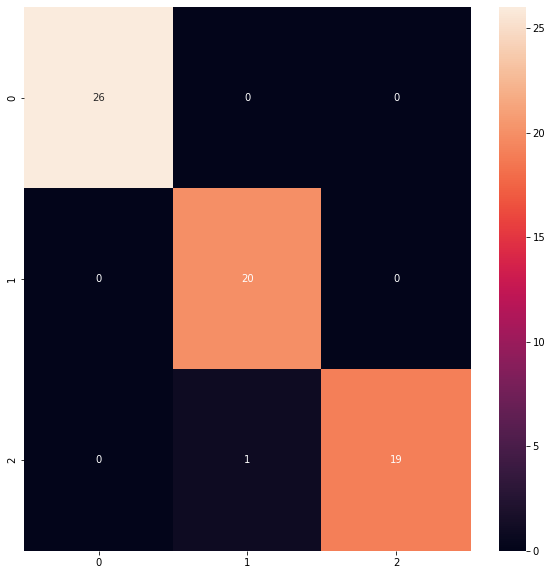

In [ ]:
cm = confusion_matrix(y_val, predict)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True,)